# Covid-19 Country Similarity Analysis

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Load source data

In [2]:
data_path = "https://open-covid-19.github.io/data/data.csv"
df = pd.read_csv(data_path)
df.head()

,Date,Key,CountryCode,CountryName,RegionCode,RegionName,Confirmed,Deaths,Latitude,Longitude,Population
0,2019-12-30,AE,AE,United Arab Emirates,NaN,NaN,0.0,0.0,23.424076,53.847818,9770529.0
1,2019-12-30,AF,AF,Afghanistan,NaN,NaN,0.0,0.0,33.939110,67.709953,38041754.0
2,2019-12-30,AM,AM,Armenia,NaN,NaN,0.0,0.0,40.069099,45.038189,2957731.0
3,2019-12-30,AT,AT,Austria,NaN,NaN,0.0,0.0,47.516231,14.550072,8955102.0
4,2019-12-30,AU,AU,Australia,NaN,NaN,0.0,0.0,-25.274398,133.775136,25203198.0


## Filter for country records with more than 100 confirmed cases

In [3]:
nan_region = df.RegionName.isnull()
df_countries  = df[nan_region]
df_countries = df_countries[df_countries["Confirmed"] >= 100]
df_countries.head()

,Date,Key,CountryCode,CountryName,RegionCode,RegionName,Confirmed,Deaths,Latitude,Longitude,Population
1263,2020-01-18,CN,CN,China,NaN,NaN,216.0,3.0,35.86166,104.195397,1.433784e+09
1329,2020-01-19,CN,CN,China,NaN,NaN,235.0,3.0,35.86166,104.195397,1.433784e+09
1395,2020-01-20,CN,CN,China,NaN,NaN,386.0,6.0,35.86166,104.195397,1.433784e+09
1462,2020-01-21,CN,CN,China,NaN,NaN,526.0,17.0,35.86166,104.195397,1.433784e+09
1528,2020-01-22,CN,CN,China,NaN,NaN,623.0,17.0,35.86166,104.195397,1.433784e+09


## Prepare [country -> data] dictionary

In [4]:
countries = set(df_countries["CountryName"])
countries_dict = {country_name:df_countries[df_countries["CountryName"] == country_name] for country_name in countries }


countries_dict["Australia"].head()

,Date,Key,CountryCode,CountryName,RegionCode,RegionName,Confirmed,Deaths,Latitude,Longitude,Population
10039,2020-03-09,AU,AU,Australia,NaN,NaN,100.0,3.0,-25.274398,133.775136,25203198.0
10380,2020-03-10,AU,AU,Australia,NaN,NaN,112.0,3.0,-25.274398,133.775136,25203198.0
10729,2020-03-11,AU,AU,Australia,NaN,NaN,126.0,3.0,-25.274398,133.775136,25203198.0
11129,2020-03-12,AU,AU,Australia,NaN,NaN,156.0,3.0,-25.274398,133.775136,25203198.0
11541,2020-03-13,AU,AU,Australia,NaN,NaN,197.0,3.0,-25.274398,133.775136,25203198.0


## Find Kolmogorov–Smirnov statistic for all country combinations (with at least 50 samples)

In [5]:
results = []
for k1 in countries_dict.keys():
    for k2 in countries_dict.keys():
        if k1 == k2:
            continue   
            
        df1 = countries_dict[k1]["Confirmed"].values
        df2 = countries_dict[k2]["Confirmed"].values
        
        if len(df1) < 50 or len(df2) < 50:
            continue
            
        if len(list(filter(lambda x: x["first_country"] == k2 and x["second_country"] == k1, results))) > 0 :
            continue   
        
        ks_result = stats.ks_2samp(df1, df2)
        results.append({"first_country": k1, "second_country": k2, "p_value": ks_result.pvalue})

In [6]:
for x in results[:5]:
    print('{0:<20} {1:>30} {2:>50}'.format(x["first_country"], x["second_country"], x["p_value"]))

Iran                                 United Kingdom                                0.05258004127812299
Iran                                         Norway                              7.771561172376096e-16
Iran                                        Belgium                               3.99063387839238e-05
Iran                                          Spain                              4.996092820563902e-07
Iran                                    South Korea                                                0.0


## Find only countries that are somehow similar

In [7]:
similar_countries = list(filter(lambda x: x["p_value"] > 0.1, results))
for x in similar_countries:
    print('{0:<20} {1:>30} {2:>50}'.format(x["first_country"], x["second_country"], x["p_value"]))

United Kingdom                              Germany                                0.44909394453241347
United Kingdom                               France                                 0.6534998005028062
Belgium                                 Netherlands                                 0.5741562429811664
Spain                                         Italy                                  0.524575776669777
Singapore                                     Japan                                0.24532348373075408
Switzerland                             Netherlands                                0.19603451031951316


## Plot confirmed cases for United Kingdom, France and Australia using log scale

[None]

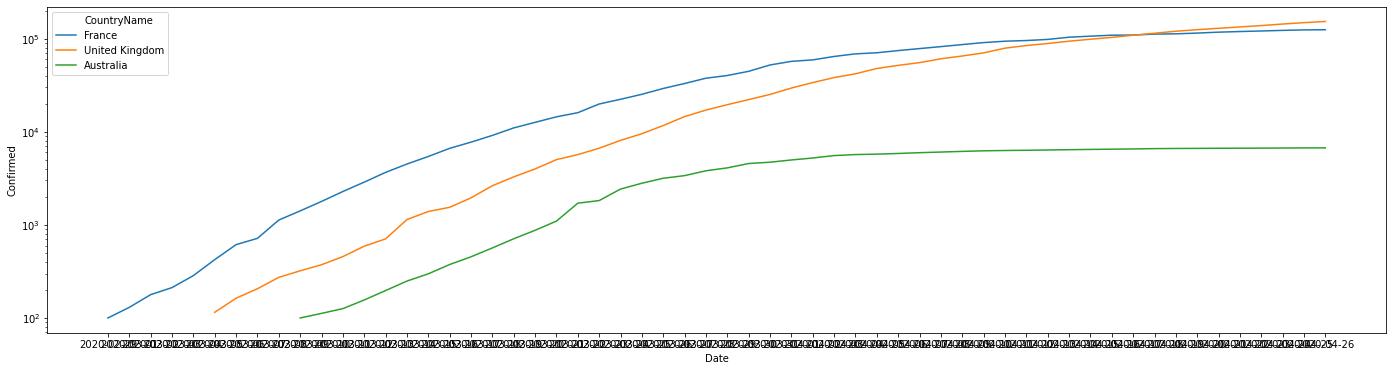

In [8]:
plt.figure(figsize=(24, 6))
ax = sns.lineplot(x="Date", y="Confirmed", 
                  hue="CountryName",
                  data=pd.concat([countries_dict["France"], countries_dict["United Kingdom"], countries_dict["Australia"] ]))

ax.set( yscale="log")

## Histograms are better to show distribution

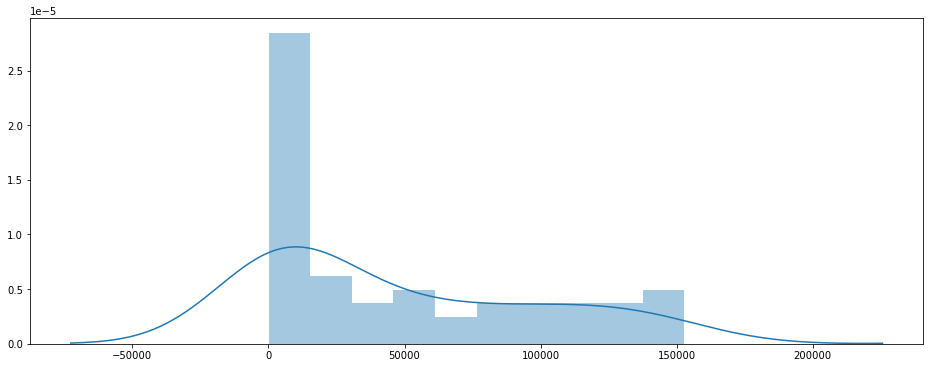

In [9]:
plt.figure(figsize=(16, 6))
ax = sns.distplot(countries_dict["United Kingdom"]["Confirmed"].values, bins = 10)

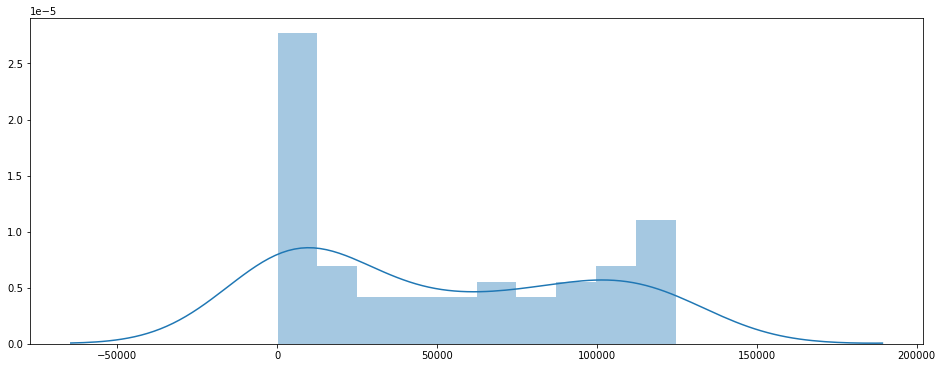

In [10]:
plt.figure(figsize=(16, 6))
ax = sns.distplot(countries_dict["France"]["Confirmed"].values, bins = 10)

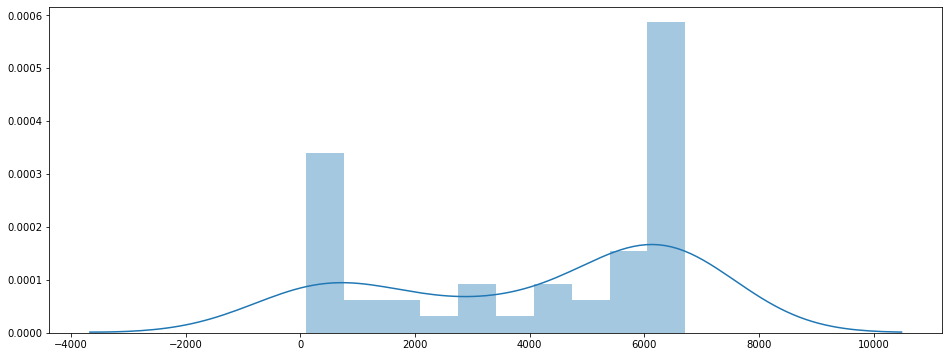

In [11]:
plt.figure(figsize=(16, 6))
ax = sns.distplot(countries_dict["Australia"]["Confirmed"].values, bins = 10)